# Experiment 1: Results of copying algorithms in dimension 2 with MNN copies

In this notebook, we show results corresponding to Experiment 1, described in the thesis report. Specifically, we present the fidelities and accuracies of the Medium Neural Network copies (MNN) trained with Algorithms 1 and 2 in the two-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the MNN hard copies. In addition, we show plots that describe the evolution of these metrics across different training dataset sizes, where computations were limited to 1,000,000 synthetic samples and 240 seconds.

As a remark, this particular notebook corresponds to the execution with seed 42. Nevertheless, the line plots that appear below have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Overlapping Gaussians dataset

### Black box 1: Random Forest classifier

In [3]:
# Load the data
with open("../results/results_DS1_1_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.935


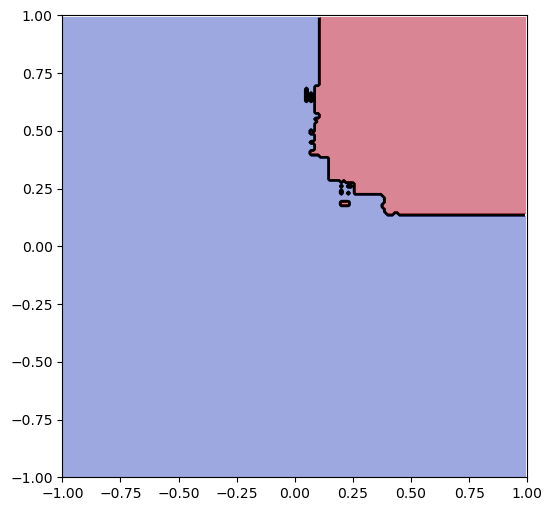

In [4]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.005936


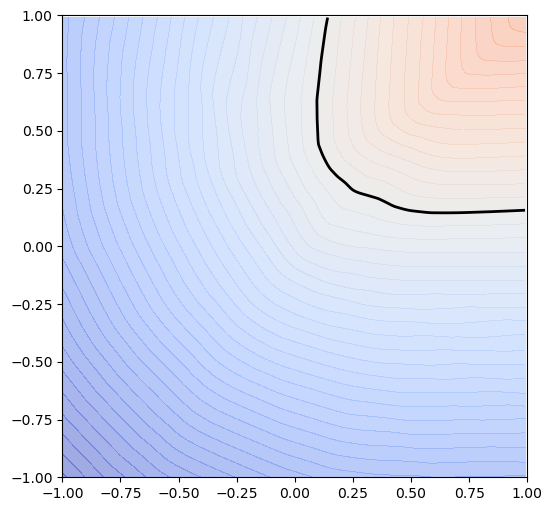

In [5]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.00408


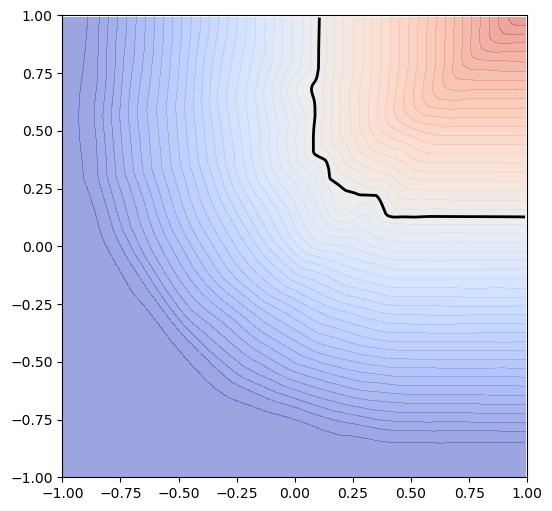

In [6]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.003805


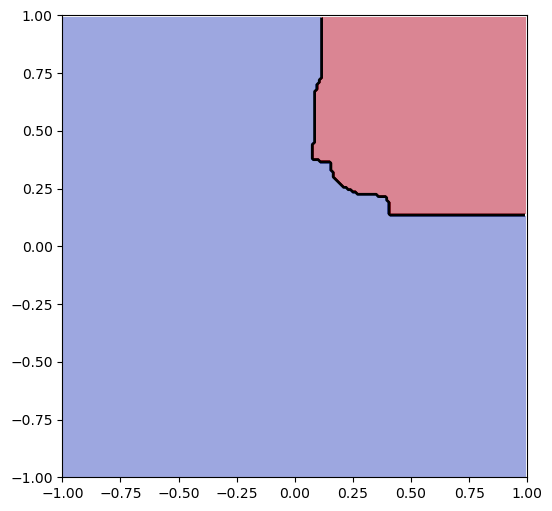

In [7]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

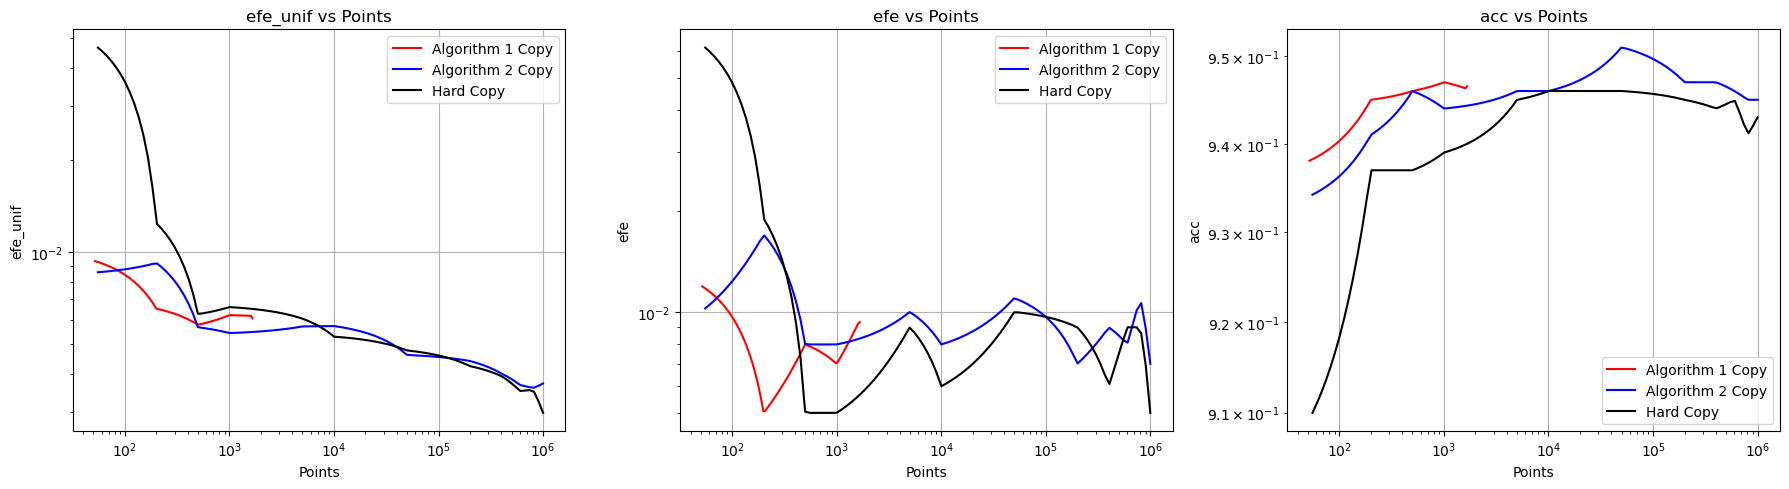

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9460   0.0020 0.0100   0.0000      0.0062        0.0003    1791.6000  69.8931
 Model 2 0.9450   0.0032 0.0070   0.0024      0.0037        0.0004 1000000.0000   0.0000
 Model 3 0.9430   0.0024 0.0050   0.0045      0.0030        0.0010 1000000.0000   0.0000
Blackbox 0.9400   0.0045                                                                


In [8]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_1_2_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [9]:
# Load the data
with open("../results/results_DS1_2_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.93


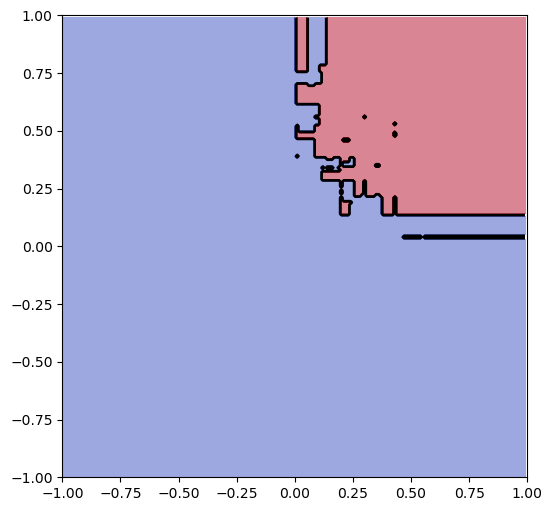

In [10]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.02
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.018382


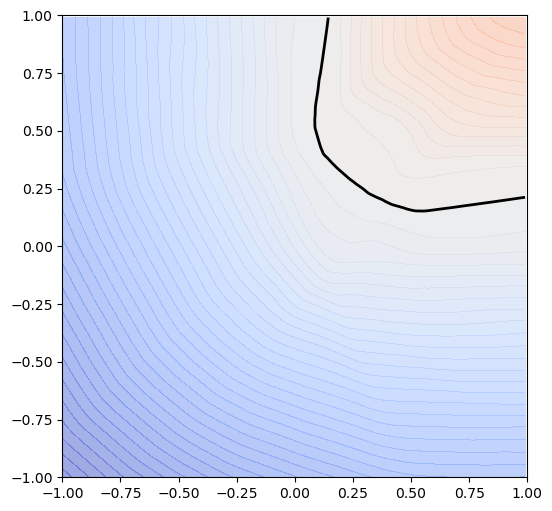

In [11]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.02
The accuracy over the test dataset is: 0.95
The empirical fidelity error over a big synthetic and uniform dataset is: 0.009111


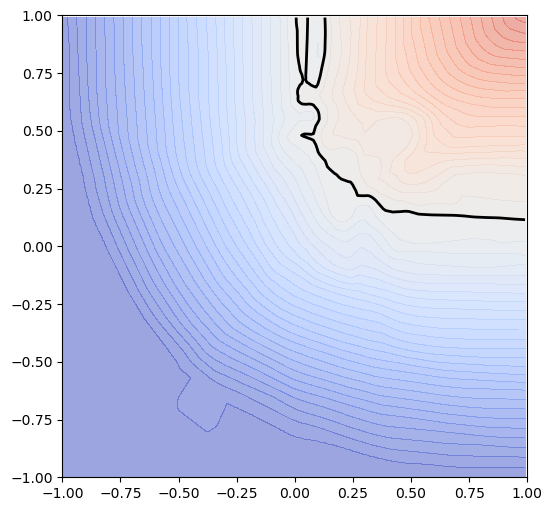

In [12]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.005
The accuracy over the test dataset is: 0.935
The empirical fidelity error over a big synthetic and uniform dataset is: 0.005373


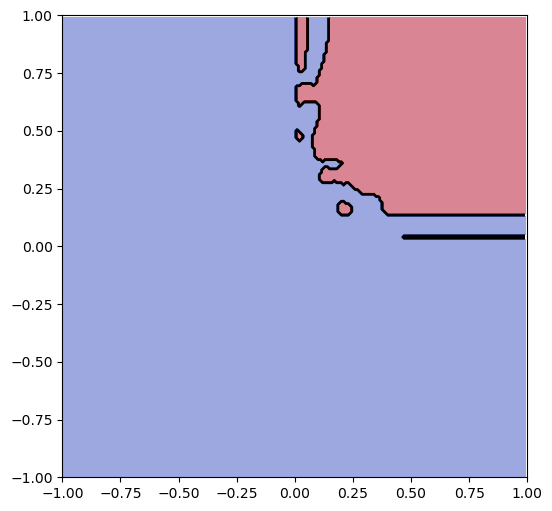

In [13]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

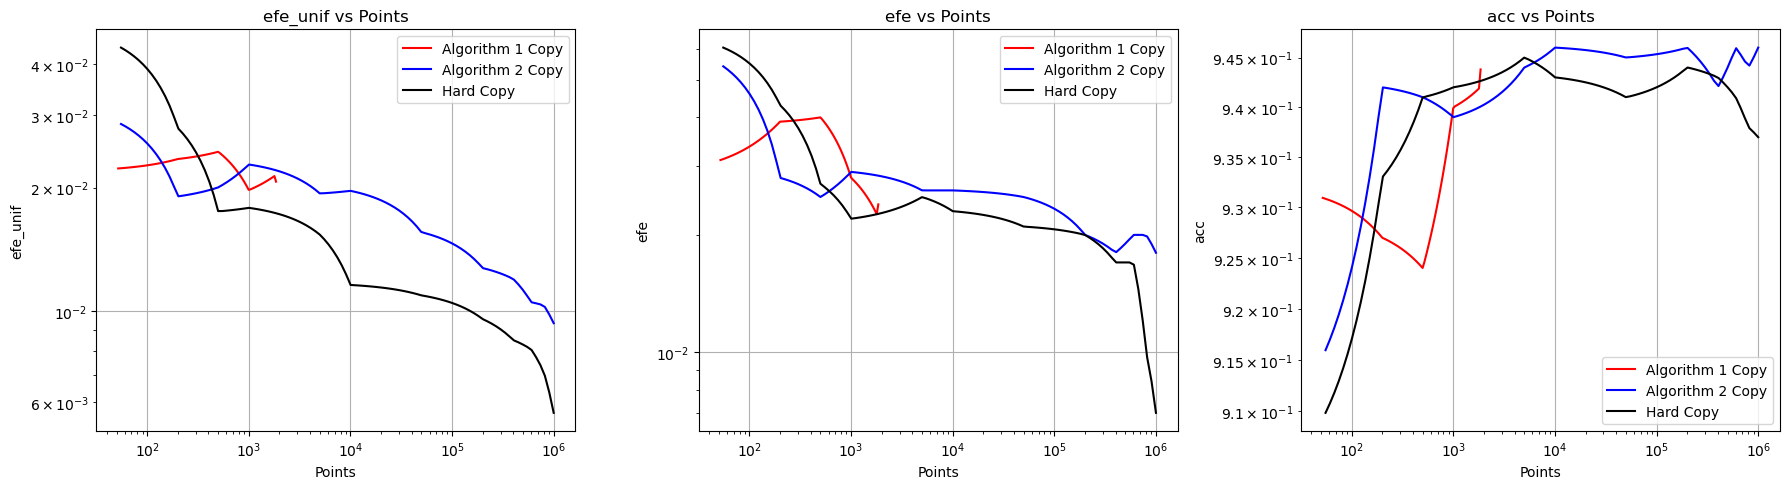

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9420   0.0068 0.0220   0.0068      0.0216        0.0047    1993.0000  77.6196
 Model 2 0.9460   0.0037 0.0180   0.0051      0.0094        0.0007 1000000.0000   0.0000
 Model 3 0.9370   0.0024 0.0070   0.0024      0.0057        0.0008 1000000.0000   0.0000
Blackbox 0.9300   0.0000                                                                


In [14]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_2_2_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [15]:
# Load the data
with open("../results/results_DS1_3_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.945


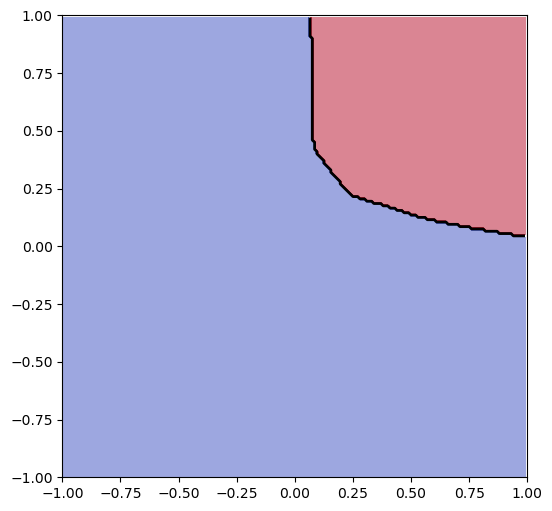

In [16]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.000837


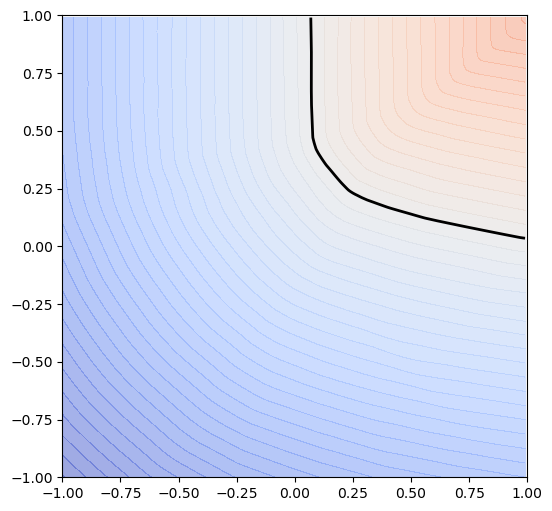

In [17]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.0012


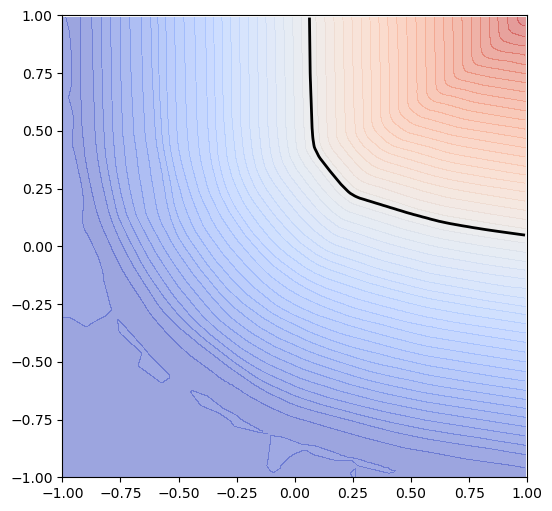

In [18]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.000922


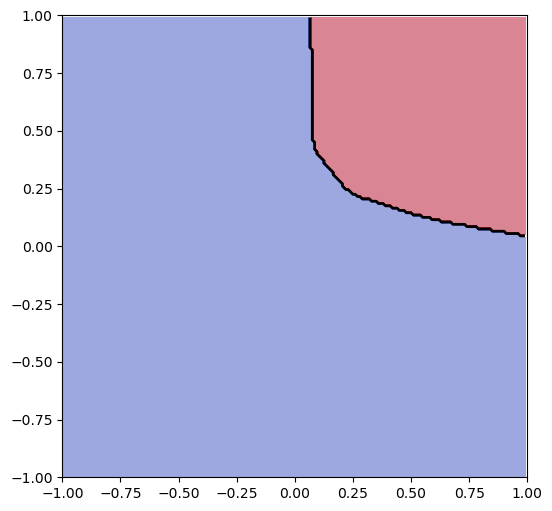

In [19]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

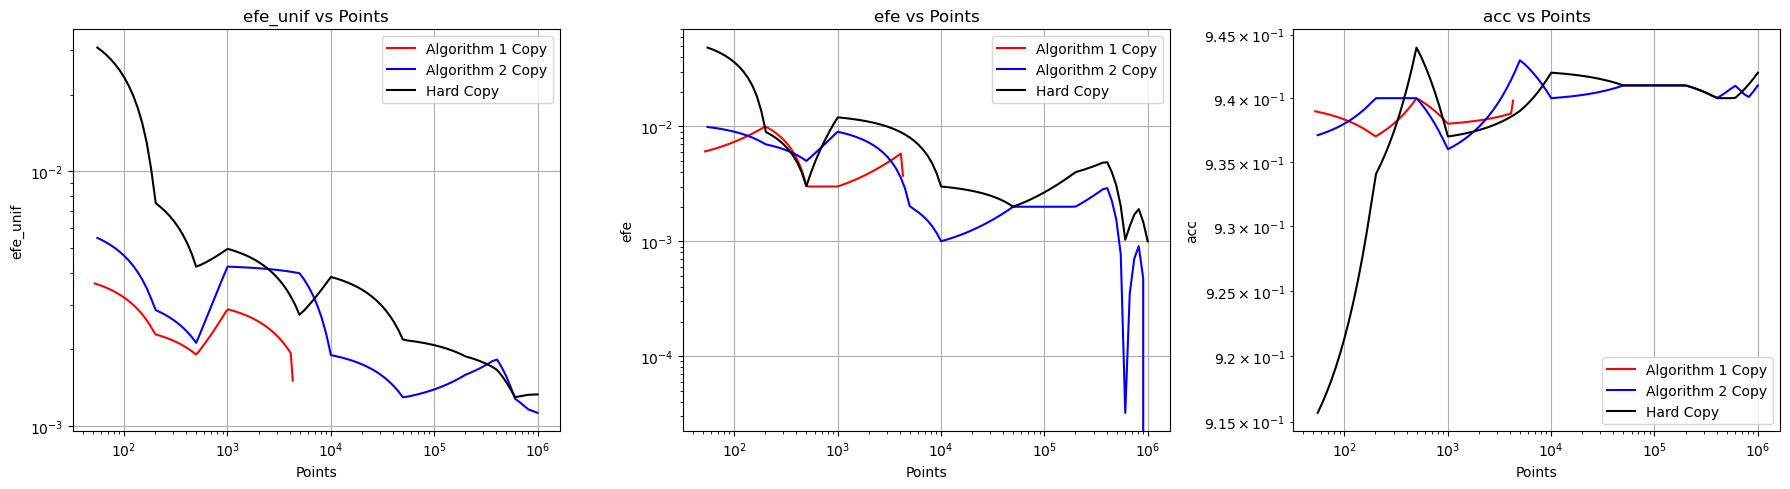

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9390   0.0037 0.0060   0.0058      0.0018        0.0009    4438.4000 115.2417
 Model 2 0.9410   0.0037 0.0000   0.0000      0.0011        0.0002 1000000.0000   0.0000
 Model 3 0.9420   0.0024 0.0010   0.0020      0.0013        0.0005 1000000.0000   0.0000
Blackbox 0.9410   0.0037                                                                


In [20]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_3_2_seed")
print(summary_df.to_string(index=False))

## Two spirals dataset

### Black box 1: Random Forest classifier

In [21]:
# Load the data
with open("../results/results_DS2_1_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.9915


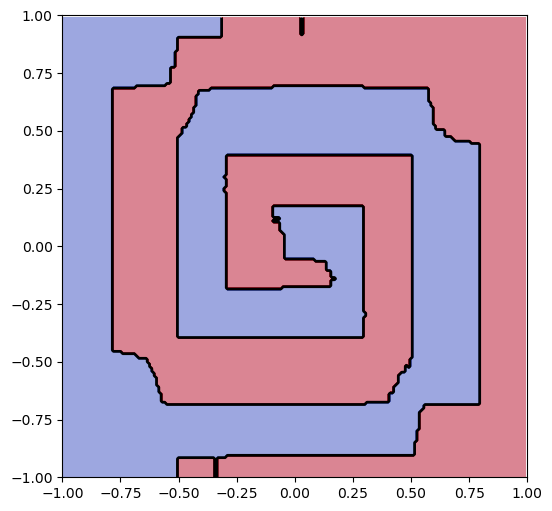

In [22]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.9905
The empirical fidelity error over a big synthetic and uniform dataset is: 0.034887


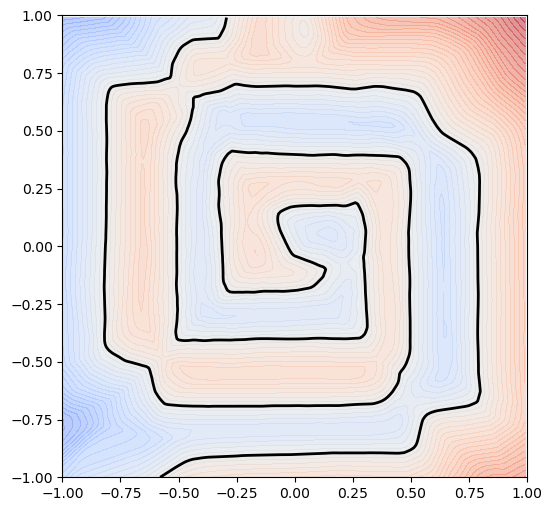

In [23]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.007
The accuracy over the test dataset is: 0.9955
The empirical fidelity error over a big synthetic and uniform dataset is: 0.015703


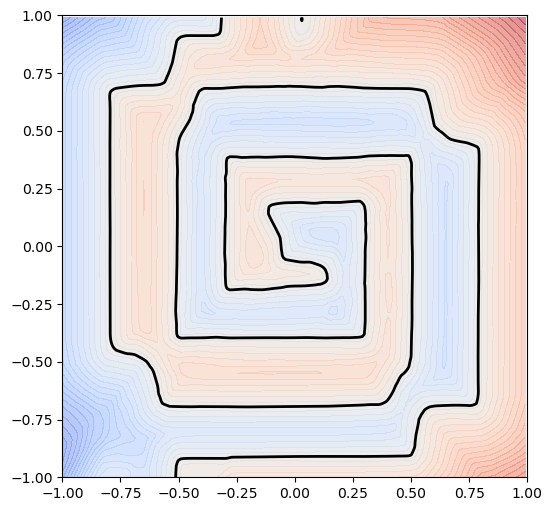

In [24]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0045
The accuracy over the test dataset is: 0.99
The empirical fidelity error over a big synthetic and uniform dataset is: 0.017036


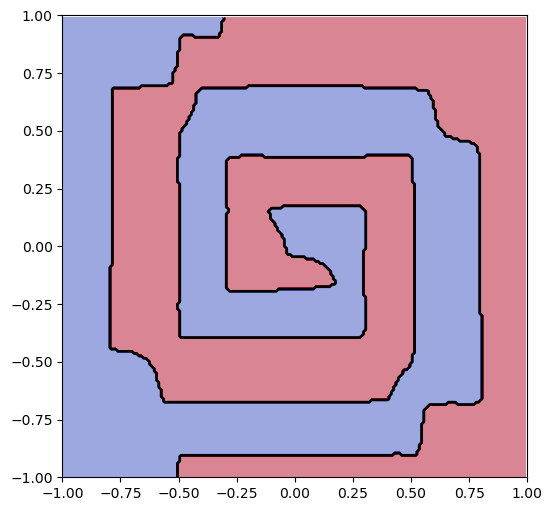

In [25]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

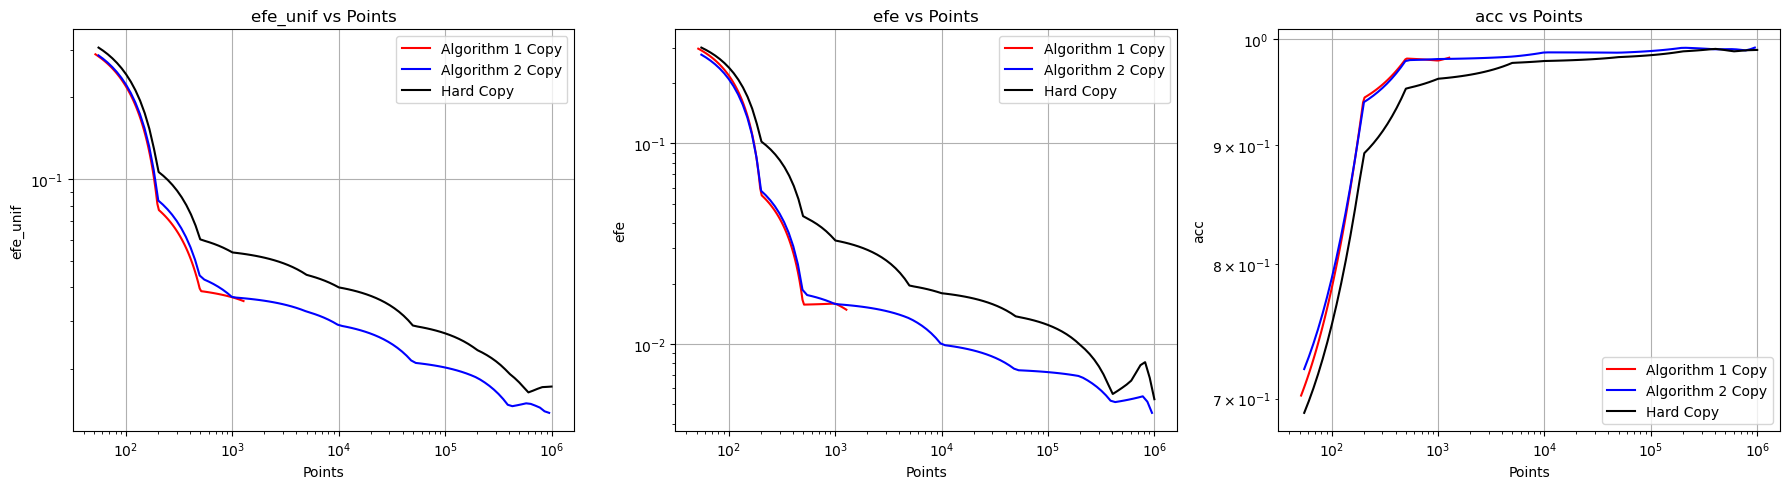

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.9833   0.0067 0.0133   0.0063      0.0355        0.0080    1411.6000    86.5300
 Model 2 0.9925   0.0022 0.0045   0.0025      0.0132        0.0013  990005.0000 19990.0000
 Model 3 0.9893   0.0017 0.0053   0.0016      0.0173        0.0017 1000000.0000     0.0000
Blackbox 0.9900   0.0014                                                                  


In [26]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_1_2_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [27]:
# Load the data
with open("../results/results_DS2_2_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.9965


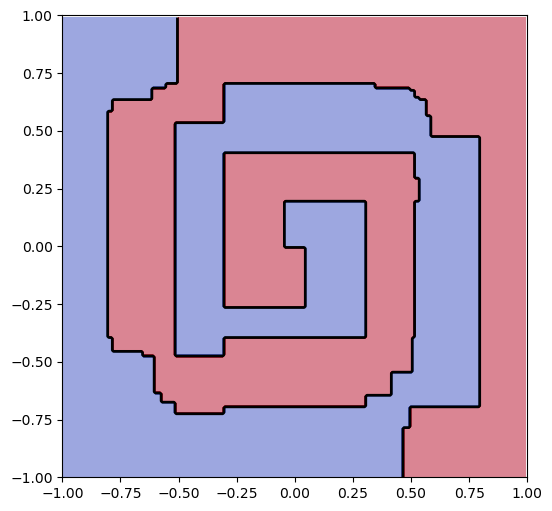

In [28]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.006
The accuracy over the test dataset is: 0.9975
The empirical fidelity error over a big synthetic and uniform dataset is: 0.026191


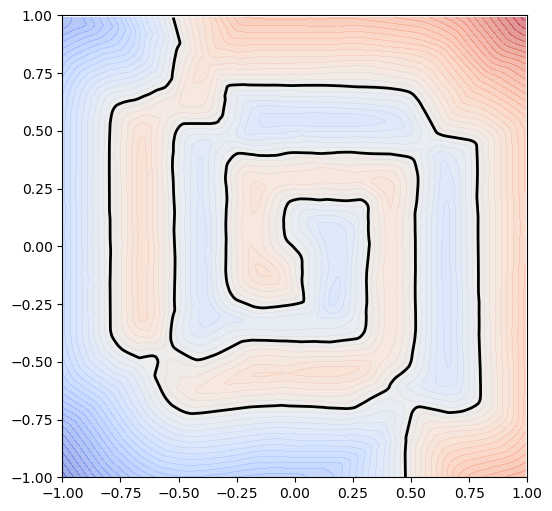

In [29]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0035
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.010687


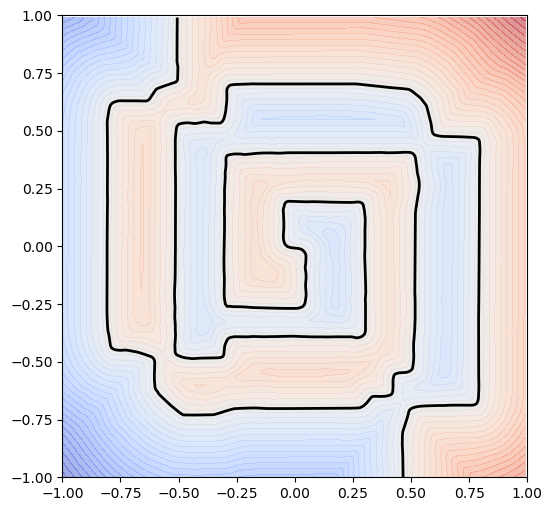

In [30]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.004
The accuracy over the test dataset is: 0.9965
The empirical fidelity error over a big synthetic and uniform dataset is: 0.014777


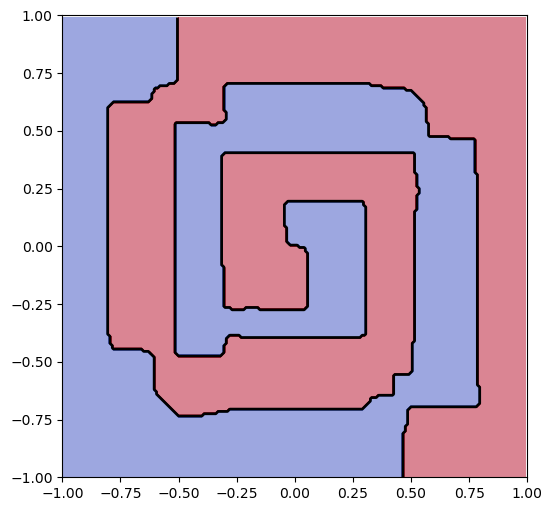

In [31]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

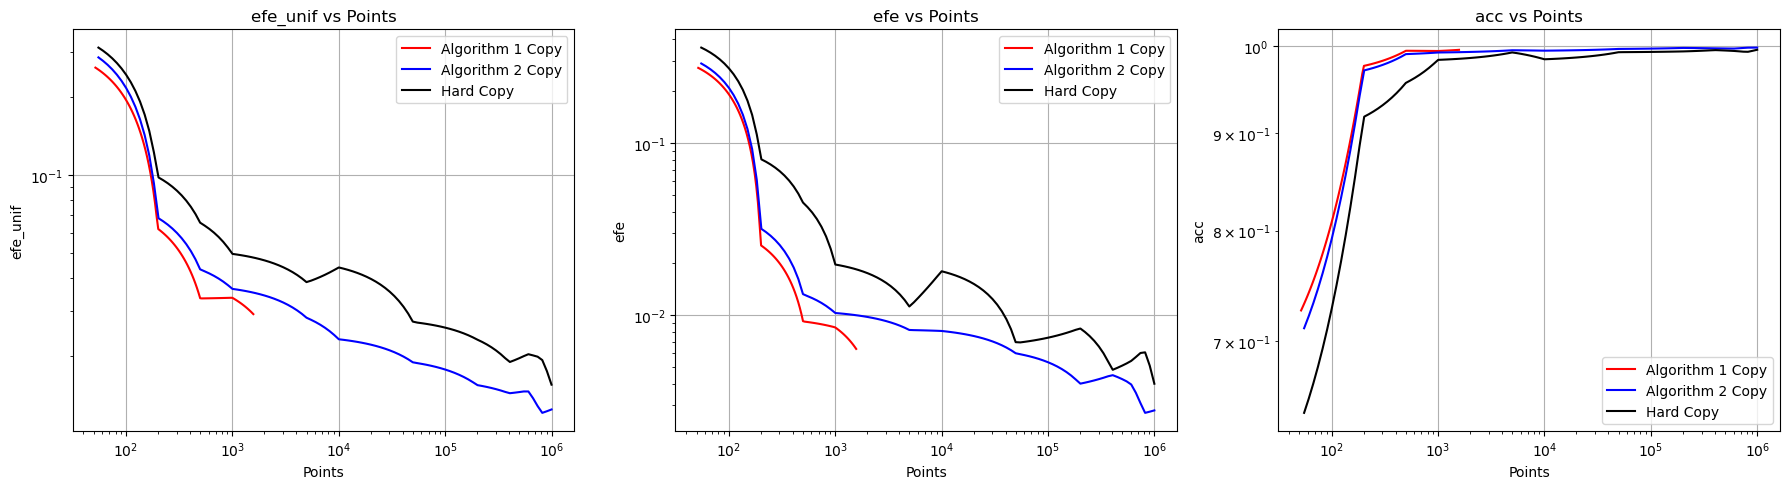

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9951   0.0030 0.0064   0.0017      0.0277        0.0044    1768.6000 110.3569
 Model 2 0.9981   0.0010 0.0028   0.0010      0.0125        0.0015 1000000.0000   0.0000
 Model 3 0.9955   0.0009 0.0040   0.0017      0.0155        0.0032 1000000.0000   0.0000
Blackbox 0.9965   0.0000                                                                


In [32]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_2_2_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [33]:
# Load the data
with open("../results/results_DS2_3_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 1.0


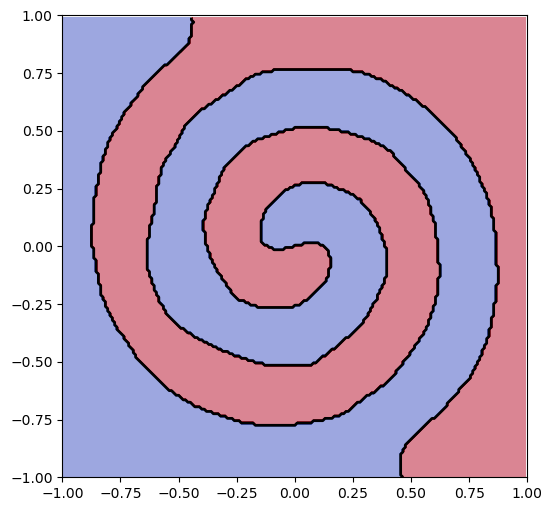

In [34]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.013584


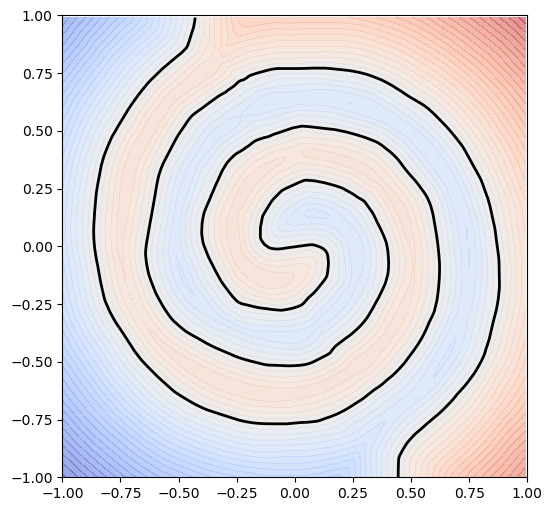

In [35]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.009375


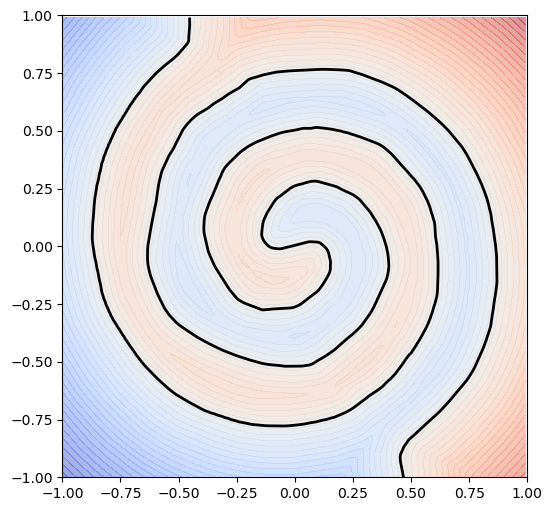

In [36]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.010171


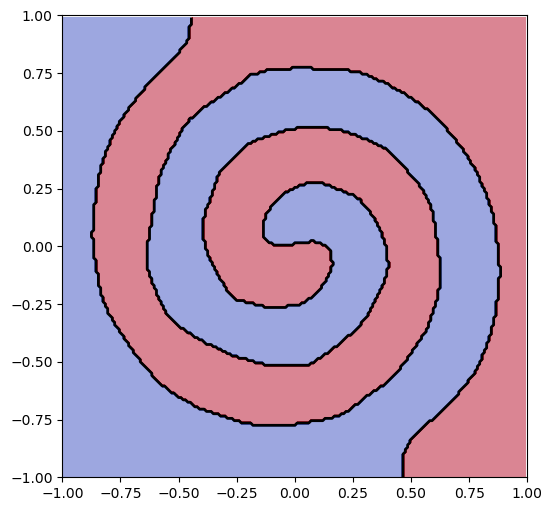

In [37]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

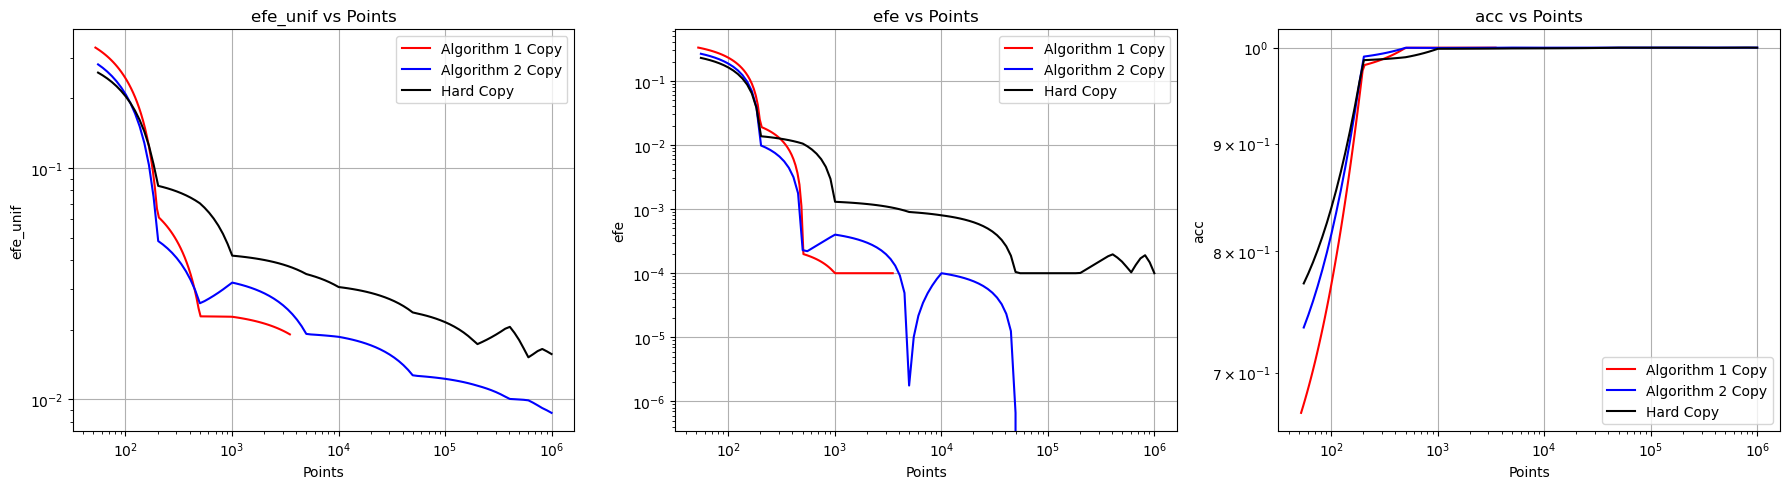

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9998   0.0002 0.0001   0.0002      0.0193        0.0057    3710.6000 169.5224
 Model 2 0.9999   0.0002 0.0000   0.0000      0.0087        0.0023 1000000.0000   0.0000
 Model 3 0.9998   0.0002 0.0001   0.0002      0.0157        0.0032 1000000.0000   0.0000
Blackbox 0.9999   0.0002                                                                


In [38]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_3_2_seed")
print(summary_df.to_string(index=False))

## Space-filling and convoluted dataset

### Black box 1: Random Forest classifier

In [39]:
# Load the data
with open("../results/results_DS3_1_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.8755


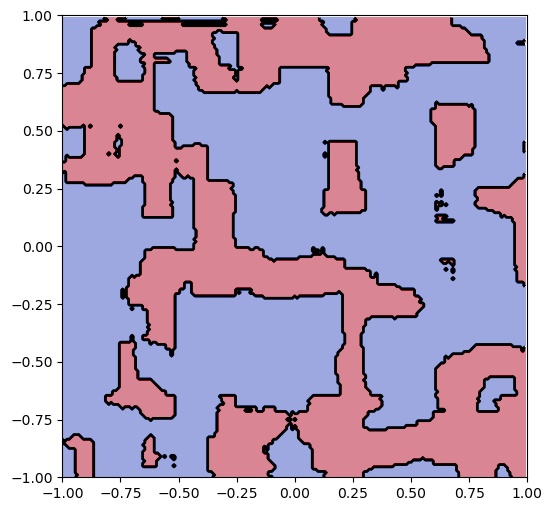

In [40]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.1265
The accuracy over the test dataset is: 0.789
The empirical fidelity error over a big synthetic and uniform dataset is: 0.128125


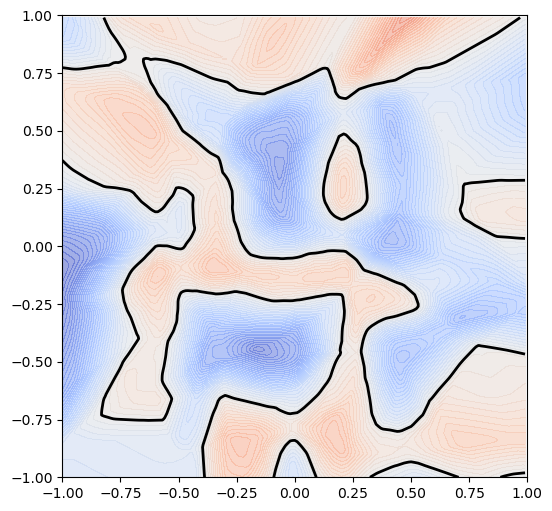

In [41]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.046
The accuracy over the test dataset is: 0.8605
The empirical fidelity error over a big synthetic and uniform dataset is: 0.046014


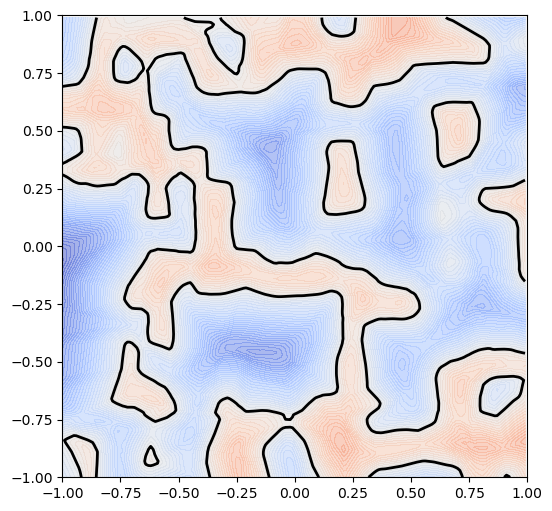

In [42]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.047
The accuracy over the test dataset is: 0.8515
The empirical fidelity error over a big synthetic and uniform dataset is: 0.042517


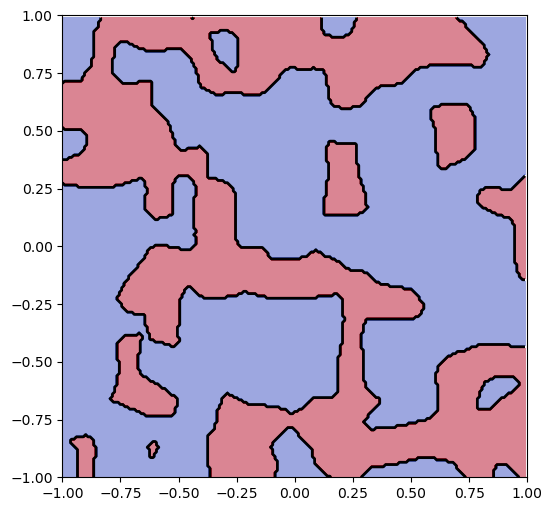

In [43]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

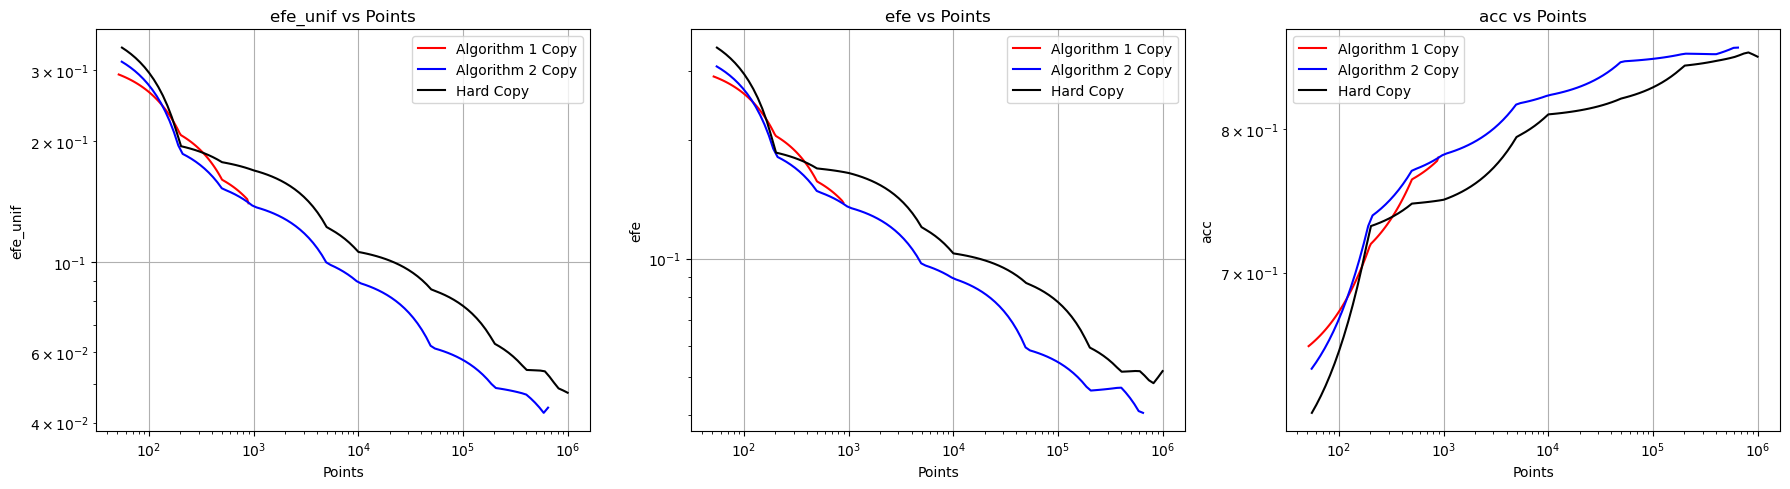

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.7829   0.0085 0.1333   0.0059      0.1352        0.0108     992.6000    62.7076
 Model 2 0.8622   0.0027 0.0408   0.0046      0.0444        0.0031  698280.0000 31814.7780
 Model 3 0.8556   0.0065 0.0518   0.0045      0.0475        0.0043 1000000.0000     0.0000
Blackbox 0.8748   0.0031                                                                  


In [44]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_1_2_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [45]:
# Load the data
with open("../results/results_DS3_2_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.895


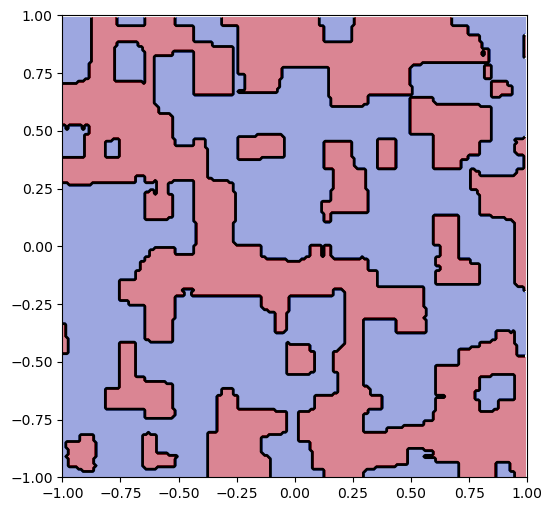

In [46]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.1665
The accuracy over the test dataset is: 0.7995
The empirical fidelity error over a big synthetic and uniform dataset is: 0.156454


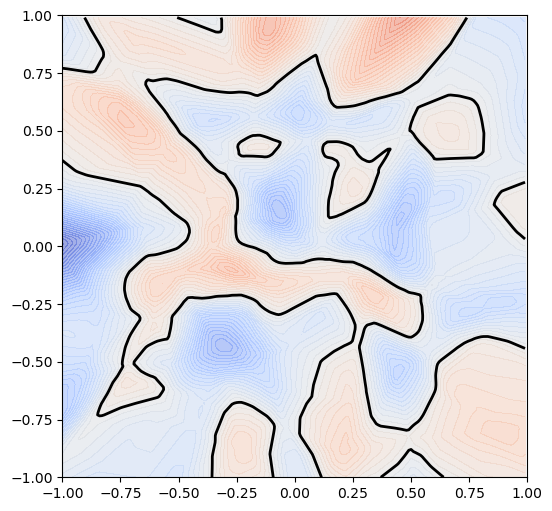

In [47]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0505
The accuracy over the test dataset is: 0.8835
The empirical fidelity error over a big synthetic and uniform dataset is: 0.054664


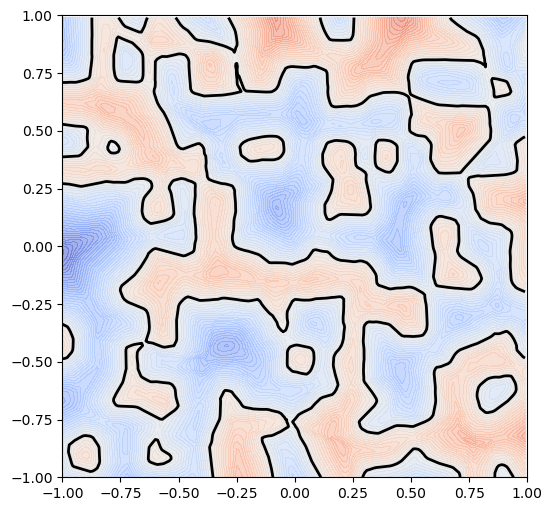

In [48]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0665
The accuracy over the test dataset is: 0.8665
The empirical fidelity error over a big synthetic and uniform dataset is: 0.070027


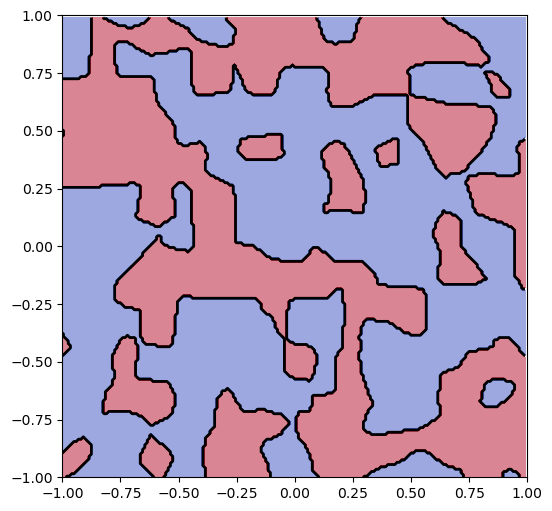

In [49]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

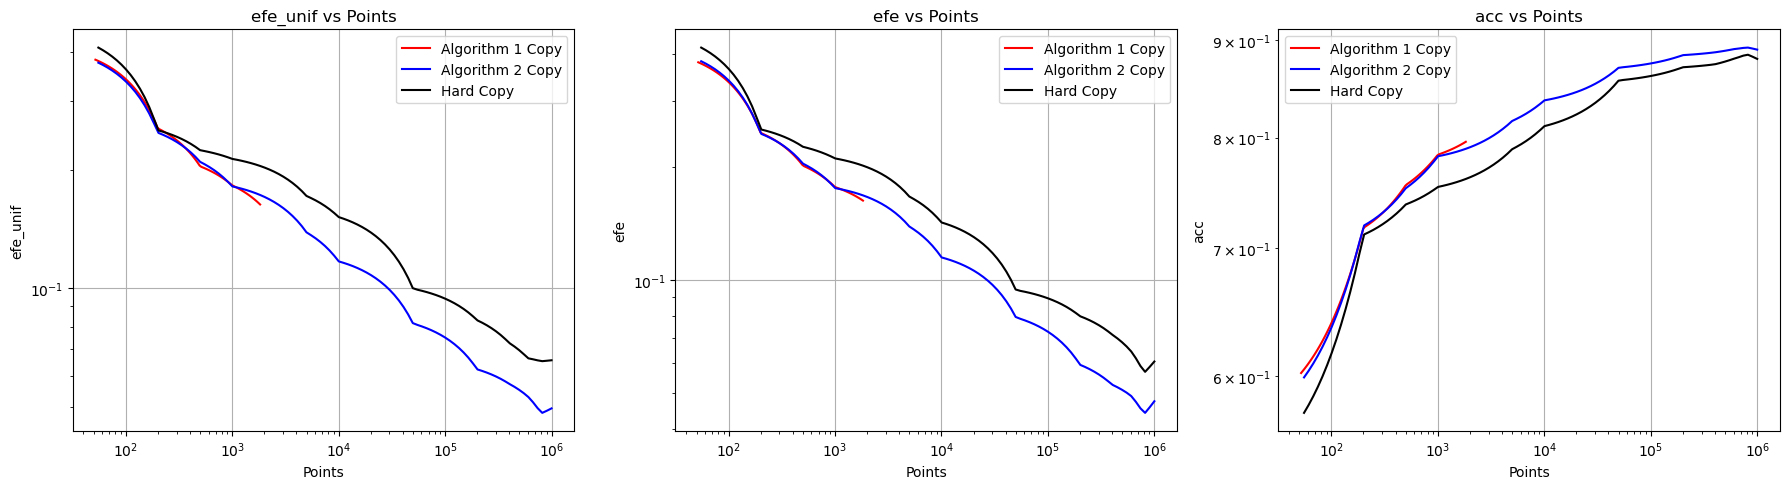

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.7976   0.0085 0.1610   0.0043      0.1615        0.0026    1922.0000  64.9862
 Model 2 0.8895   0.0040 0.0475   0.0075      0.0496        0.0040 1000000.0000   0.0000
 Model 3 0.8796   0.0091 0.0606   0.0057      0.0657        0.0065 1000000.0000   0.0000
Blackbox 0.8950   0.0000                                                                


In [50]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_2_2_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [51]:
# Load the data
with open("../results/results_DS3_3_2_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.814


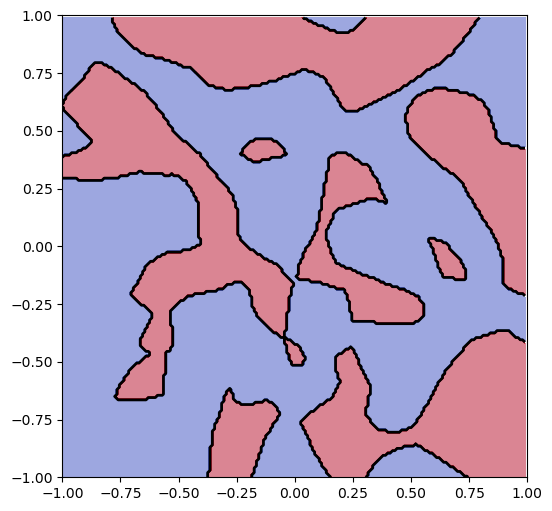

In [52]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0495
The accuracy over the test dataset is: 0.7875
The empirical fidelity error over a big synthetic and uniform dataset is: 0.052747


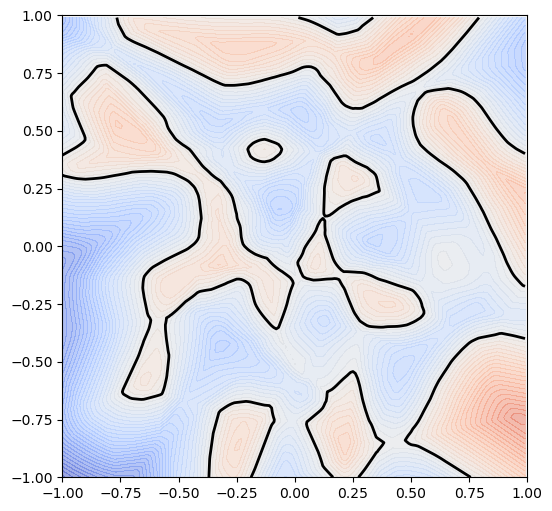

In [53]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0165
The accuracy over the test dataset is: 0.8095
The empirical fidelity error over a big synthetic and uniform dataset is: 0.017707


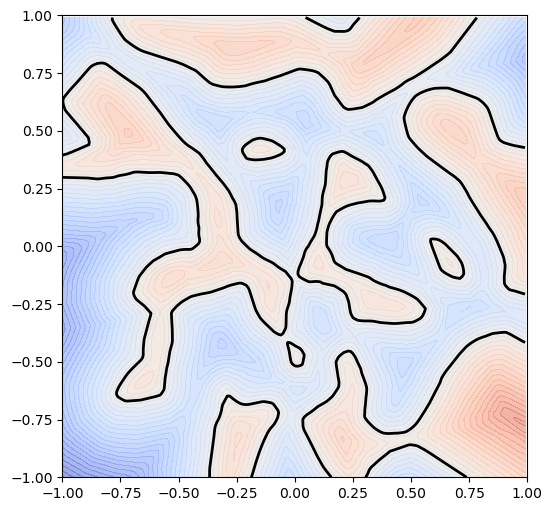

In [54]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0275
The accuracy over the test dataset is: 0.8145
The empirical fidelity error over a big synthetic and uniform dataset is: 0.026927


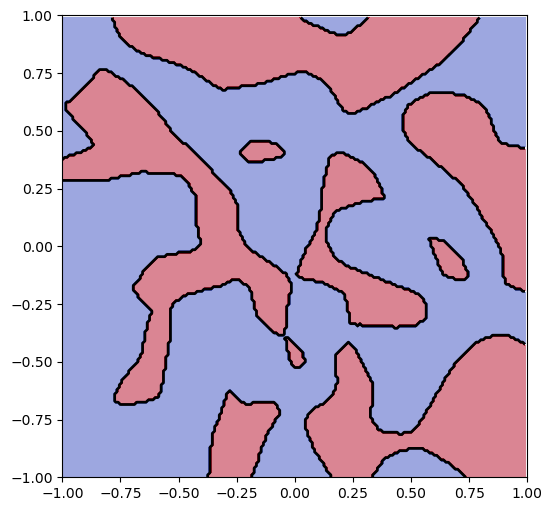

In [55]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

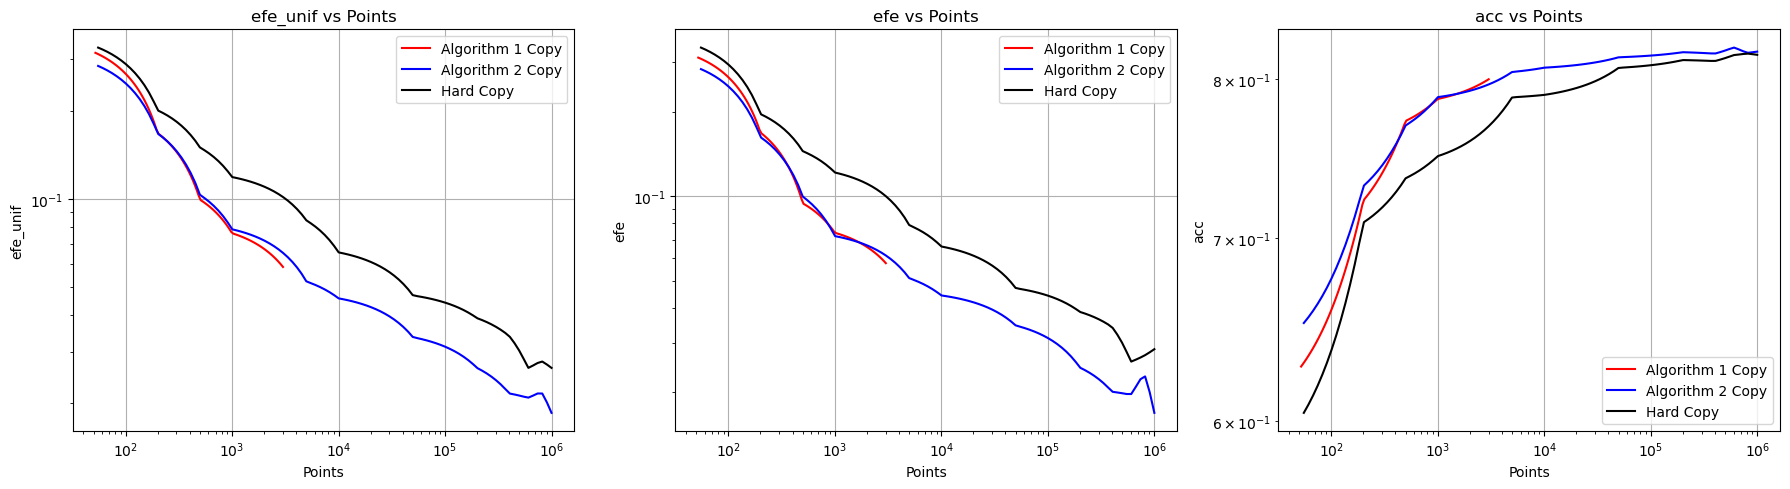

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8028   0.0097 0.0555   0.0061      0.0559        0.0070    3355.6000 223.4776
 Model 2 0.8190   0.0080 0.0169   0.0017      0.0185        0.0020 1000000.0000   0.0000
 Model 3 0.8168   0.0092 0.0285   0.0056      0.0264        0.0041 1000000.0000   0.0000
Blackbox 0.8215   0.0082                                                                


In [56]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_3_2_seed")
print(summary_df.to_string(index=False))